In [1]:
import torch

from dinov2.fsdp import FSDPCheckpointer
from dinov2.models.vision_transformer import DinoVisionTransformer


/home/jluesch/Documents/GitHub/plankton-dinov2/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/jluesch/Documents/GitHub/plankton-dinov2/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/jluesch/Documents/GitHub/plankton-dinov2/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [2]:
ckpt_0 = '/home/jluesch/Documents/output_dir/run_05012024_141438/model_final.rank_0.pth'

In [3]:
import os
import socket

os.environ['RANK']='0'
os.environ['WORLD_SIZE']='2'
os.environ['MASTER_ADDR']='127.0.0.1'
os.environ['MASTER_PORT']='0'

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    # A "" host address means INADDR_ANY i.e. binding to all interfaces.
    # Note this is not compatible with IPv6.
    s.bind(("", 0))
    port = s.getsockname()[1]

print(111)
print(port)

111
50949


In [4]:
print(os.environ['MASTER_PORT'])


0


In [5]:
import torch.distributed as tdist

tdist.init_process_group(backend='nccl')

RuntimeError: Timed out initializing process group in store based barrier on rank: 0, for key: store_based_barrier_key:1 (world_size=2, worker_count=1, timeout=0:30:00)

In [ ]:
torch.load(ckpt_0, map_location='cpu')

In [13]:
list_t =["Amphidinium_sp","Asterionellopsis","Bacillaria","Bidulphia","Cerataulina","Cerataulina_flagellate","Ceratium","Chaetoceros","Chaetoceros_didymus","Chaetoceros_didymus_flagellate","Chaetoceros_flagellate","Chaetoceros_other","Chaetoceros_pennate","Chrysochromulina","Ciliate_mix","Cochlodinium","Corethron","Coscinodiscus","Cylindrotheca","DactFragCerataul","Dactyliosolen","Delphineis","Dictyocha","Didinium_sp","Dinobryon","Dinophysis","Ditylum","Ditylum_parasite","Emiliania_huxleyi","Ephemera","Eucampia","Euglena","Euplotes_sp","G_delicatula_detritus","G_delicatula_external_parasite","G_delicatula_parasite","Gonyaulax","Guinardia_delicatula","Guinardia_flaccida","Guinardia_striata","Gyrodinium","Hemiaulus","Heterocapsa_triquetra","Katodinium_or_Torodinium","Laboea_strobila","Lauderia","Leegaardiella_ovalis","Leptocylindrus","Leptocylindrus_mediterraneus","Licmophora","Mesodinium_sp","Odontella","Paralia","Parvicorbicula_socialis","Phaeocystis","Pleuronema_sp","Pleurosigma","Prorocentrum","Proterythropsis_sp","Protoperidinium","Pseudochattonella_farcimen","Pseudonitzschia","Pyramimonas_longicauda","Rhizosolenia","Skeletonema","Stephanopyxis","Strobilidium_morphotype1","Strombidium_capitatum","Strombidium_conicum","Strombidium_inclinatum","Strombidium_morphotype1","Strombidium_morphotype2","Strombidium_oculatum","Strombidium_wulffi","Thalassionema","Thalassiosira","Thalassiosira_dirty","Tiarina_fusus","Tintinnid","Tontonia_appendiculariformis","Tontonia_gracillima","amoeba","bad","bead","bubble","clusterflagellate","detritus","diatom_flagellate","dino30","dino_large1","flagellate_sp3","kiteflagellates","mix","mix_elongated","other_interaction","pennate","pennate_morphotype1","pennates_on_diatoms","pollen","spore","zooplankton"]

In [16]:
list_v = ["Akashiwo","Amphidinium_sp","Asterionellopsis","Bacillaria","Bidulphia","Cerataulina","Cerataulina_flagellate","Ceratium","Chaetoceros","Chaetoceros_didymus","Chaetoceros_didymus_flagellate","Chaetoceros_flagellate","Chaetoceros_other","Chaetoceros_pennate","Chrysochromulina","Ciliate_mix","Cochlodinium","Corethron","Coscinodiscus","Cylindrotheca","DactFragCerataul","Dactyliosolen","Delphineis","Dictyocha","Didinium_sp","Dinobryon","Dinophysis","Ditylum","Ditylum_parasite","Emiliania_huxleyi","Ephemera","Eucampia","Euglena","Euplotes_sp","G_delicatula_detritus","G_delicatula_external_parasite","G_delicatula_parasite","Guinardia_delicatula","Guinardia_flaccida","Guinardia_striata","Gyrodinium","Hemiaulus","Heterocapsa_triquetra","Katodinium_or_Torodinium","Laboea_strobila","Lauderia","Leegaardiella_ovalis","Leptocylindrus","Leptocylindrus_mediterraneus","Licmophora","Mesodinium_sp","Odontella","Paralia","Parvicorbicula_socialis","Phaeocystis","Pleuronema_sp","Pleurosigma","Prorocentrum","Proterythropsis_sp","Protoperidinium","Pseudochattonella_farcimen","Pseudonitzschia","Pyramimonas_longicauda","Rhizosolenia","Skeletonema","Stephanopyxis","Strobilidium_morphotype1","Strombidium_capitatum","Strombidium_conicum","Strombidium_inclinatum","Strombidium_morphotype1","Strombidium_morphotype2","Strombidium_oculatum","Strombidium_wulffi","Thalassionema","Thalassiosira","Thalassiosira_dirty","Tiarina_fusus","Tintinnid","Tontonia_appendiculariformis","Tontonia_gracillima","amoeba","bad","bead","clusterflagellate","detritus","diatom_flagellate","dino30","dino_large1","flagellate_sp3","kiteflagellates","mix","mix_elongated","other_interaction","pennate","pennate_morphotype1","pennates_on_diatoms","pollen","spore","zooplankton"]

In [17]:
set(list_t).difference(set(list_v))

{'Gonyaulax', 'bubble'}

In [35]:
import os
import h5py
import json
import pandas as pd

In [36]:
root = '/home/jluesch/Documents/data/plankton'

In [37]:
files = os.listdir(root)

In [53]:

acc_ids = []
acc_names = []

all_files_entries = dict()
class_names_dict = dict()
for hdf5_file in files:
    print(hdf5_file, end=" ")
    all_files_entries[hdf5_file] = []
    class_ids = []
    class_names = []
    hdf5_file_path = os.path.join(root, hdf5_file)
    file = h5py.File(hdf5_file_path, 'r')

    # Read the JSON string from the 'file_index' dataset
    file_index_json = file['file_index'][()]
    file_index = json.loads(file_index_json)

    # Add the HDF5 file name to each entry and accumulate the file entries
    for entry in file_index['files']:
        entry['hdf5_file'] = hdf5_file_path  # Add the HDF5 file name to the entry
        all_files_entries[hdf5_file].append(entry)
        class_id = entry['class_id']
        class_str = entry['class_str']
        if class_id not in class_ids:
            class_ids.append(class_id)
            class_names.append(class_str)

        if class_id not in acc_ids:
            acc_ids.append(class_id)
            acc_names.append(class_str)
    class_names_dict[hdf5_file] = class_names

    print(len(class_ids))

2011-VAL.hdf5 94
2007-TRAIN.hdf5 88
2013-VAL.hdf5 93
2008-TRAIN.hdf5 92
2009-TRAIN.hdf5 94
2010-VAL.hdf5 97
2012-VAL.hdf5 95
2014-VAL.hdf5 94


In [75]:
class_count = dict()
for entry in entries[:10]:
    print(entry)

{'index': 0, 'path': '2014_Akashiwo_IFCB1_2014_277_165430_04321.png', 'class_str': 'Akashiwo', 'class_id': 101, 'hdf5_file': '/home/jluesch/Documents/data/plankton/2014-VAL.hdf5'}
{'index': 1, 'path': '2014_amoeba_IFCB1_2014_188_215702_06173.png', 'class_str': 'amoeba', 'class_id': 0, 'hdf5_file': '/home/jluesch/Documents/data/plankton/2014-VAL.hdf5'}
{'index': 2, 'path': '2014_amoeba_IFCB1_2014_188_222013_06882.png', 'class_str': 'amoeba', 'class_id': 0, 'hdf5_file': '/home/jluesch/Documents/data/plankton/2014-VAL.hdf5'}
{'index': 3, 'path': '2014_amoeba_IFCB1_2014_188_224330_01921.png', 'class_str': 'amoeba', 'class_id': 0, 'hdf5_file': '/home/jluesch/Documents/data/plankton/2014-VAL.hdf5'}
{'index': 4, 'path': '2014_amoeba_IFCB1_2014_270_212839_05223.png', 'class_str': 'amoeba', 'class_id': 0, 'hdf5_file': '/home/jluesch/Documents/data/plankton/2014-VAL.hdf5'}
{'index': 5, 'path': '2014_amoeba_IFCB1_2014_270_212839_05436.png', 'class_str': 'amoeba', 'class_id': 0, 'hdf5_file': '/hom

In [54]:
len(acc_ids)

102

In [55]:
class_names_dict.keys()

dict_keys(['2011-VAL.hdf5', '2007-TRAIN.hdf5', '2013-VAL.hdf5', '2008-TRAIN.hdf5', '2009-TRAIN.hdf5', '2010-VAL.hdf5', '2012-VAL.hdf5', '2014-VAL.hdf5'])

In [69]:
all_names = set()
for v in class_names_dict.values():
    all_names = all_names.union(set(v))

In [70]:
print(len(all_names))

102


In [72]:
for k, v in class_names_dict.items():
    print(k, ' missing :', all_names.difference(set(v)))

2011-VAL.hdf5  missing : {'Gonyaulax', 'Tiarina_fusus', 'Chaetoceros_didymus_flagellate', 'bubble', 'pollen', 'Akashiwo', 'Tontonia_appendiculariformis', 'bead'}
2007-TRAIN.hdf5  missing : {'Gonyaulax', 'Cochlodinium', 'dino_large1', 'Chaetoceros_didymus_flagellate', 'Euplotes_sp', 'bubble', 'pennate_morphotype1', 'Akashiwo', 'Tontonia_appendiculariformis', 'Hemiaulus', 'bead', 'Emiliania_huxleyi', 'Cerataulina_flagellate', 'Bacillaria'}
2013-VAL.hdf5  missing : {'Gonyaulax', 'Tiarina_fusus', 'Didinium_sp', 'bubble', 'Akashiwo', 'Hemiaulus', 'kiteflagellates', 'Bidulphia', 'Leptocylindrus_mediterraneus'}
2008-TRAIN.hdf5  missing : {'Cochlodinium', 'dino_large1', 'Didinium_sp', 'Akashiwo', 'Pseudochattonella_farcimen', 'kiteflagellates', 'bead', 'Emiliania_huxleyi', 'Leptocylindrus_mediterraneus', 'Bacillaria'}
2009-TRAIN.hdf5  missing : {'Chaetoceros_didymus_flagellate', 'bubble', 'Akashiwo', 'Hemiaulus', 'kiteflagellates', 'Emiliania_huxleyi', 'Leptocylindrus_mediterraneus', 'Bacillar

In [1]:
import sys
import os

sys.path.insert(0, '..')

import numpy as np
import torch
import matplotlib.pyplot as plt


from functools import partial
from datetime import datetime

from dinov2.data import SamplerType, make_data_loader, make_dataset
from dinov2.data import collate_data_and_cast, DataAugmentationDINO, MaskingGenerator
import dinov2.distributed as distributed


In [2]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.is_initialized())


True
2
False


In [3]:
#torch.cuda.set_device(0)
print(torch.cuda.is_initialized())


False


In [4]:
train_ds_path = 'HDF5Dataset:split=TRAIN:root=/home/jluesch/Documents/data/plankton/2007-TRAIN.hdf5:extra=*'
img_size = 224
patch_size = 14
n_tokens = (img_size // patch_size) ** 2
inputs_dtype = torch.half

print(torch.cuda.is_initialized())

mask_generator = MaskingGenerator(
    input_size=(img_size // patch_size, img_size // patch_size),
    max_num_patches=0.5 * img_size // patch_size * img_size // patch_size,
)

print(torch.cuda.is_initialized())

data_transform = DataAugmentationDINO(
    (0.32, 1.0),
    (0.05, 0.32),
    8,
    global_crops_size=224,
    local_crops_size=96,
    do_transform_on_gpu=True,
)

print(torch.cuda.is_initialized())

collate_fn = partial(
    collate_data_and_cast,
    mask_ratio_tuple=(0.1, 0.5),
    mask_probability=0.5,
    n_tokens=n_tokens,
    mask_generator=mask_generator,
    dtype=inputs_dtype,
)

print(torch.cuda.is_initialized())

# setup data loader
dataset = make_dataset(
dataset_str=train_ds_path,
transform=data_transform,
target_transform=lambda _: (),
)

print(f'#samples: {len(dataset)}')
print(torch.cuda.is_initialized())


False
False
False
False
Dataset kwargs {'split': <_SplitHDF5Dataset.TRAIN: 'train'>, 'root': '/home/jluesch/Documents/data/plankton/2007-TRAIN.hdf5', 'extra': '*', 'do_short_run': False}
root: /home/jluesch/Documents/data/plankton/2007-TRAIN.hdf5, extra_root: *, extra_path: /home/jluesch/Documents/data/plankton/2007-TRAIN.hdf5
Datasets file list:  ['/home/jluesch/Documents/data/plankton/2007-TRAIN.hdf5']
#unique_class_ids: _SplitHDF5Dataset.TRAIN, 88
#unique_class_names: ['Amphidinium_sp' 'Asterionellopsis' 'Bidulphia' 'Cerataulina' 'Ceratium'
 'Chaetoceros' 'Chaetoceros_didymus' 'Chaetoceros_flagellate'], 88
#samples: 289020
False


In [5]:
from dinov2.models.vision_transformer import vit_small


batch_size_list = [64]
num_workers_list = [1]
MAX_NB_SAMPLE = 5
verbose=False

#model = vit_small(patch_size=16, num_register_tokens=0)
for num_workers in num_workers_list:
    for batch_size in batch_size_list:

        # sampler_type = SamplerType.INFINITE
        sampler_type = SamplerType.SHARDED_INFINITE
        data_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        pin_memory=True,
        persistent_workers=True,
    )
        print(torch.cuda.is_initialized())

        # do cuda distributed init w single gpu
        start_t = datetime.now().timestamp()

        batch_delta_ts = []
        batch_start_t = datetime.now().timestamp()
        for i, el in enumerate(data_loader):
            print(torch.cuda.is_initialized())

            for v in el.values():
                if torch.is_tensor(v):
                    v=v.cuda()
            print(el['collated_global_crops'].shape, el['collated_global_crops'].dtype)

            batch_end_t = datetime.now().timestamp()

            batch_delta_t = (batch_end_t-batch_start_t)
            batch_delta_ts.append(batch_delta_t)

            if verbose or i%100 == 0:
                print(f'{i}, {i*batch_size}: {batch_delta_t:.5}')
                for v in el.values():
                    print(el['collated_masks'].cuda().device, end=" ")
                print()
            if verbose:
                print(el['collated_masks'].shape)
                print(el['mask_indices_list'].shape)
                print(el['masks_weight'].shape)
                print(el['upperbound'], el['n_masked_patches'])

            batch_start_t = datetime.now().timestamp()

            if i * batch_size >= MAX_NB_SAMPLE:
                end_t = datetime.now().timestamp()
                break


        total_t = end_t - start_t
        mean_batch = np.mean(batch_delta_ts)
        std_batch = np.std(batch_delta_ts)
        max_batch = np.max(batch_delta_ts)
        min_batch = np.min(batch_delta_ts)
        print(f'BATCH SIZE {batch_size}, NUM WORKERS {num_workers}, TIME TOTAL: {total_t:.5}')
        print(f'PER BATCH: {mean_batch:.5} ± {std_batch:.5}, max {max_batch:.5}, min {min_batch:.5}')
        print(f'TIME PER SAMPLE: {mean_batch/batch_size:.5} ± {std_batch/batch_size:.5}, max {max_batch/batch_size:.5}, min {min_batch/batch_size:.5}')
        print()




False
False


/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/data/datasets/extended.py", line 38, in __getitem__
    image, target = self.transforms(image, target)
  File "/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torchvision/datasets/vision.py", line 94, in __call__
    input = self.transform(input)
  File "/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/data/augmentations.py", line 112, in __call__
    image = self.to_cuda_tensor(image)
  File "/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/data/augmentations.py", line 138, in to_cuda_tensor
    return image.to(device='cuda')
  File "/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torch/cuda/__init__.py", line 235, in _lazy_init
    raise RuntimeError(
RuntimeError: Cannot re-initialize CUDA in forked subprocess. To use CUDA with multiprocessing, you must use the 'spawn' start method


In [2]:
import os

data_path = "/home/jluesch/Documents/data/plankton"
data_files = sorted([el for el in os.listdir(data_path) if el.endswith(".hdf5")])
data_files = data_files[1:]
print(data_files)
print(data_files[0][:-5])

['2008-VAL.hdf5', '2009-VAL.hdf5', '2010-TRAIN.hdf5', '2011-TRAIN.hdf5', '2012-VAL.hdf5', '2013-VAL.hdf5', '2014-TRAIN.hdf5']
2008-VAL


In [3]:
from io import BytesIO
import pandas as pd
import h5py
import json
from PIL import Image
import lmdb

map_size = int(1e11)
for data_file in data_files:
    train_data_path = f"/home/jluesch/Documents/data/plankton/{data_file}"

    lmdb_imgs_path = f"/home/jluesch/Documents/data/plankton/lmdb/{data_file[:-5]}_imgs"
    lmdb_labels_path = f"/home/jluesch/Documents/data/plankton/lmdb/{data_file[:-5]}_labels"
    print(lmdb_imgs_path, lmdb_labels_path)

    env_imgs = lmdb.open(lmdb_imgs_path, map_size=map_size)
    env_labels = lmdb.open(lmdb_labels_path, map_size=map_size)

    file = h5py.File(train_data_path, "r")
    # Read the JSON string from the 'file_index' dataset
    file_index_json = file["file_index"][()]
    file_index = json.loads(file_index_json)
    print(f"#SAMPLES: {file_index['files']}")

    with env_labels.begin(write=True) as txn_labels:
        with env_imgs.begin(write=True) as txn_imgs:
            for entry in file_index["files"]:
                if entry["index"] % 50000 == 0:
                    print(entry["index"], entry["class_id"], entry["path"])

                img_bytes = file[entry["path"]][()]
                txn_imgs.put(str(entry["index"]).encode("utf-8"), img_bytes)
                txn_labels.put(str(entry["index"]).encode("utf-8"), str(entry["class_id"]).encode("utf-8"))
    env_imgs.close()
    env_labels.close()
    print(f"FINISHED {lmdb_imgs_path}")

/home/jluesch/Documents/data/plankton/2008-VAL.hdf5
dict_keys(['index', 'path', 'class_str', 'class_id'])
0 0 0 2008_amoeba_IFCB1_2008_043_185649_01270.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
40000 40000 21 2008_detritus_IFCB1_2008_116_215800_01249.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
80000 80000 41 2008_Heterocapsa_triquetra_IFCB1_2008_056_161935_02442.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
120000 120000 51 2008_mix_IFCB1_2008_056_161935_01314.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
160000 160000 51 2008_mix_IFCB1_2008_073_144023_00095.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
200000 200000 51 2008_mix_IFCB1_2008_095_001923_02526.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
240000 240000 51 2008_mix_IFCB1_2008_114_175618_01003.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
280000 280000 51 2008_mix_IFCB1_2008_199_143321_03547.png
dict_keys(['index', 'path', 'class_str', 

key 0
(224, 224)


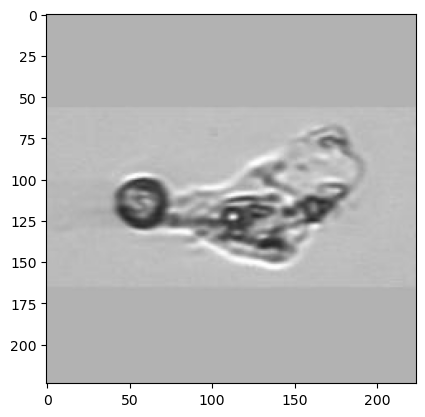

0
key 1
(224, 224)


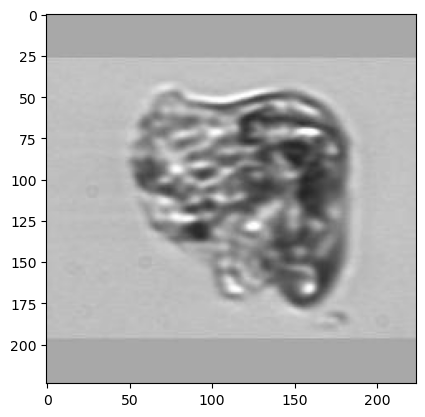

0
key 10
(224, 224)


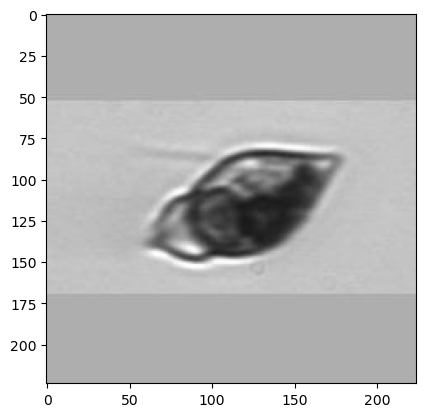

1
key 100
(224, 224)


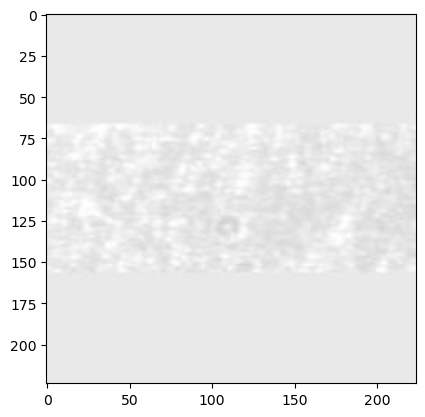

3


In [65]:
import matplotlib.pyplot as plt

lmdb_env_imgs = lmdb.open(
    "/home/jluesch/Documents/data/plankton/lmdb/2007-TRAIN_imgs",
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False,
)
lmdb_env_labels = lmdb.open(
    "/home/jluesch/Documents/data/plankton/lmdb/2007-TRAIN_labels",
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False,
)

lmdb_txn_imgs = lmdb_env_imgs.begin()
lmdb_cursor_imgs = lmdb_txn_imgs.cursor()

lmdb_txn_labels = lmdb_env_labels.begin()
lmdb_cursor_labels = lmdb_txn_labels.cursor()

for i, ((key_i, value_i), (key_l, val_l)) in enumerate(zip(lmdb_cursor_imgs, lmdb_cursor_labels)):
    if i > 3: break
    print("key", int(key_i.decode()))
    f = BytesIO(value_i)
    img = Image.open(f).convert(mode="RGB")
    print(img.size)
    plt.imshow(img)
    plt.show()
    print(val_l.decode())